In [109]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import re
import geopandas
from geopandas.tools import geocode
from geopy.geocoders import Nominatim

%matplotlib inline

In [110]:
df = pd.read_csv('./hospital_data.csv')

In [111]:
df.head()

,Region,District,FacilityName,Type,Town,Ownership,Latitude,Longitude
0,Ashanti,Offinso North,A.M.E Zion Clinic,Clinic,Afrancho,CHAG,7.40801,-1.96317
1,Ashanti,Bekwai Municipal,Abenkyiman Clinic,Clinic,Anwiankwanta,Private,6.46312,-1.58592
2,Ashanti,Adansi North,Aboabo Health Centre,Health Centre,Aboabo No 2,Government,6.22393,-1.34982
3,Ashanti,Afigya-Kwabre,Aboabogya Health Centre,Health Centre,Aboabogya,Government,6.84177,-1.61098
4,Ashanti,Kwabre,Aboaso Health Centre,Health Centre,Aboaso,Government,6.84177,-1.61098


In [112]:
df.shape

(3756, 8)

In [113]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3756 entries, 0 to 3755
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Region        3756 non-null   object 
 1   District      3756 non-null   object 
 2   FacilityName  3756 non-null   object 
 3   Type          3756 non-null   object 
 4   Town          3603 non-null   object 
 5   Ownership     3756 non-null   object 
 6   Latitude      3732 non-null   float64
 7   Longitude     3732 non-null   float64
dtypes: float64(2), object(6)
memory usage: 234.9+ KB


In [114]:
df.describe()

,Latitude,Longitude
count,3732.000000,3732.000000
mean,6.955678,-1.074580
std,1.679332,1.021352
min,4.796180,-3.235880
25%,5.687642,-1.809792
50%,6.468705,-1.058117
75%,7.430555,-0.215870
max,11.146670,1.191440


In [115]:
df.Type.unique()

array(['Clinic', 'Health Centre', 'Maternity Home', 'CHPS', 'Hospital',
       'District Hospital', 'Centre', 'RCH', 'Training Institution',
       'Municipal Health Directorate', 'Teaching Hospital',
       'Regional Hospital', 'CPHS', 'District Health Directorate',
       'Regional Health Directorate', 'Polyclinic', 'Municipal Hospital',
       'Municipal  Health Directorate', 'Metropolitan Hospital',
       'Metropolitan Health Directorate', 'DHD', 'Psychiatric Hospital',
       'Research Institution', 'Others', 'clinic'], dtype=object)

In [116]:
df.Type.value_counts()

Clinic                             1171
Health Centre                       786
CHPS                                652
Maternity Home                      369
Hospital                            277
RCH                                 152
District Health Directorate          99
District Hospital                    82
Training Institution                 74
Others                               31
Polyclinic                           16
Regional Health Directorate           9
Regional Hospital                     9
Municipal Health Directorate          7
Municipal Hospital                    4
Psychiatric Hospital                  3
Teaching Hospital                     3
clinic                                2
Centre                                2
Research Institution                  2
Metropolitan Health Directorate       2
Municipal  Health Directorate         1
Metropolitan Hospital                 1
CPHS                                  1
DHD                                   1


In [117]:
df.Ownership.value_counts()

Government          2210
Private             1179
CHAG                 257
Quasi-Government      91
government             6
Islamic                4
Maternity Home         2
NGO                    2
private                2
Clinic                 1
Mission                1
Muslim                 1
Name: Ownership, dtype: int64

In [118]:
df.Ownership.unique()

array(['CHAG', 'Private', 'Government', 'Quasi-Government', 'Islamic',
       'Muslim', 'Maternity Home', 'Clinic', 'private', 'NGO',
       'government', 'Mission'], dtype=object)

In [119]:
df.Region.unique()

array(['Ashanti', 'Brong Ahafo', 'Central', 'Eastern', 'Greater Accra',
       'Northern', 'Upper East', 'Upper West', 'Volta', 'Western'],
      dtype=object)

In [120]:
region_district_df = df.groupby(['Region','District']).size().reset_index(name='Count')

In [121]:
# List all districts per region to find same district having different names
for val in list(region_district_df['Region'].unique()):
    districts = region_district_df.query('Region == @val')['District'].unique()
    print(" Region: {}, Number of Districts: {}\n{}\n".format(val, len(districts),districts))

 Region: Ashanti, Number of Districts: 27
['Adansi North' 'Adansi South' 'Afigya-Kwabre' 'Ahafo-Ano North'
 'Ahafo-Ano South' 'Amansie Central' 'Amansie West'
 'Asante-Akim North Municipal' 'Asante-Akim South' 'Atwima-Kwanwoma'
 'Atwima-Mponua' 'Atwima-Nwabiagya' 'Bekwai Municipal' 'Bosome Freho'
 'Bosomtwe' 'Ejisu-Juaben Municipal' 'Ejura Sekyeredumasi'
 'Kumasi Metropolitan' 'Kwabre' 'Mampong Municipal' 'Obuasi Municipal'
 'Offinso Municipal' 'Offinso North' 'Sekyere Afram Plains'
 'Sekyere Central' 'Sekyere East' 'Sekyere South']

 Region: Brong Ahafo, Number of Districts: 25
['Asunafo North Municipal' 'Asunafo South' 'Asutifi' 'Atebubu-Amanten'
 'Berekum Municipal' 'Dormaa East' 'Dormaa Municipal' 'Jaman North'
 'Jaman South' 'Kintampo North Municipal' 'Kintampo South' 'Nkoranza'
 'Nkoranza North' 'Pru' 'Sene' 'Sunyani' 'Sunyani Municipal'
 'Sunyani West' 'Tain' 'Tano North' 'Tano South' 'Techiman'
 'Techiman Municipal' 'Wenchi' 'Wenchi Municipal']

 Region: Central, Number of Dist

In [122]:
# Missing towns
missing_towns = df[df.Town.isnull()]
missing_towns

,Region,District,FacilityName,Type,Town,Ownership,Latitude,Longitude
596,Ashanti,Kumasi Metropolitan,Amansie Enterprise Clinic,Clinic,NaN,Private,6.415000,-1.375480
626,Ashanti,Kumasi Metropolitan,Restoration Clinic,Clinic,NaN,Private,6.415000,-1.375480
645,Ashanti,Mampong Municipal,Calvary Health Service,Clinic,NaN,Private,7.033970,-1.242940
653,Ashanti,Offinso Municipal,Offinso District Health Directorate,District Health Directorate,NaN,Government,6.563090,-1.402680
969,Brong Ahafo,Dormaa Municipal,Florence Maternity Home,Maternity Home,NaN,Maternity Home,7.277284,-2.876257
...,...,...,...,...,...,...,...,...
3726,Western,Tarkwa Nsuaem Municipal,Church of Pentecost Clinic,Clinic,NaN,CHAG,5.299986,-1.992202
3727,Western,Tarkwa Nsuaem Municipal,Sam Jonna Clinic,Clinic,NaN,Private,5.299986,-1.992202
3728,Western,Tarkwa Nsuaem Municipal,Divine Clinic,Clinic,NaN,Private,5.299986,-1.992202
3730,Western,Wassa-Amenfi West,Kwabeng Clinic,Clinic,NaN,Private,5.653611,-2.165901


In [123]:
missing_towns.shape

(153, 8)

In [124]:
# missing coordinates
missing_coordinates = df[df.Latitude.isnull()|df.Longitude.isnull()]
missing_coordinates

,Region,District,FacilityName,Type,Town,Ownership,Latitude,Longitude
357,Ashanti,Bosome Freho,Dunkura Health Centre,Health Centre,Dunkura,Government,NaN,NaN
358,Ashanti,Bosome Freho,Yapesa St.Mary Clinic,Clinic,Yapesa,CHAG,NaN,NaN
1651,Eastern,Akyemansa,St Johns Clinic,Clinic,Ofoase,CHAG,NaN,NaN
2437,Northern,Gushegu,Nabuli Health Centre,Health Centre,Nabuli,Government,NaN,NaN
2438,Northern,Gushegu,Damakung Clinic,Clinic,Damankung,Government,NaN,NaN
2439,Northern,Gushegu,Gushegu Hospital,Hospital,Gushiegu,Government,NaN,NaN
3416,Western,Nzema East Municipal,Ewuku CHPS,CHPS,Ewuku,Government,NaN,NaN
3417,Western,Nzema East Municipal,Kutukrom Health Centre,Health Centre,Kutukrom,Government,NaN,NaN
3663,Western,Ellembele,Aiyinase Health Centre,Health Centre,Aiyinase,Government,NaN,NaN
3664,Western,Ellembele,Nana Benie M. Clinic,Clinic,NaN,Private,NaN,NaN


In [125]:
missing_coordinates.shape

(24, 8)

In [126]:
# save data with missing data into a dataframe so that client can help retrieve them.
missing_coordinates.to_csv('missing_coordinates.csv', index=False)
missing_towns.to_csv('missing_towns.csv', index=False)

In [127]:
df[df.District == 'Bosome Freho']

,Region,District,FacilityName,Type,Town,Ownership,Latitude,Longitude
79,Ashanti,Bosome Freho,Asiwa Health Centre,Health Centre,Asiwa,Government,6.42344,-1.33434
125,Ashanti,Bosome Freho,Detieso Community Clinic,Clinic,Detieso,Government,6.47674,-1.44168
130,Ashanti,Bosome Freho,Duasi Community Clinic,Clinic,Duasi,Government,6.46863,-1.39522
156,Ashanti,Bosome Freho,Gyasikrom Health Centre,Clinic,Gyasikrom,Government,6.40145,-1.47313
357,Ashanti,Bosome Freho,Dunkura Health Centre,Health Centre,Dunkura,Government,NaN,NaN
358,Ashanti,Bosome Freho,Yapesa St.Mary Clinic,Clinic,Yapesa,CHAG,NaN,NaN


## Assessment

### Quality Issues
* Erroneous Data types: Region, District, Type, Ownership
* Missing Data: Latitude, Longitude
* Different names for the same value under a column

Type: 
    * District Health Directorate,DHD
    * Clinic, clinic
    * Health Centre, Centre
    * CHPS, CPHS
    * Municipal  Health Directorate, Municipal Health Directorate
    
Ownership:
    * Government, government
    * Private, private
    * Islamic, Muslim

Region: 
    Western:
        * 'Prestea-Huni Valley','Pretea-Huni Valley'
        * 'Nzema East','Nzema East Municipal'
    Eastern:
        * 'Birim South','Birim south'
        * 'Kwaebibirem','Kweabibirem'
        * 'New Juaben','New Juaben Municipal'
    Brong Ahafo:
        * 'Sunyani' 'Sunyani Municipal'
        * 'Techiman','Techiman Municipal'
        * 'Wenchi','Wenchi Municipal'
        
        
        
* Typographical Errors
St. Martin de Porres Hospitakl  

#### Missing Coordinates Comments
* Dunkura Health Centre - Used coordinates on the Dunkura town from https://geographic.org/geographic_names/name.php?uni=-2874515&fid=1969&c=ghana
* Yapesa St. Mary Clinic - Got location from Google Maps
* St. Johns Clinic (Ofoase) - Got coordinates from https://www.ghanayello.com/company/53475/Ofoase_St_Johns_Clinic#map. Location is plotted as St. John the Baptist Catholic Church on google maps.
* Gushegu Hospital - Location from Google Maps
* Ewuku CHPS - https://geographic.org/geographic_names/name.php?uni=-2875130&fid=1958
* Kutukrom Health Centre - https://geographic.org/geographic_names/name.php?uni=-2878816&fid=1967&c=ghana
* Aiyinase Health Centre - Google Maps
* Nana Benie M. Clinic - Google Maps as Nana Benie Memorial Clinic
* 

## Cleaning

In [128]:
# Create copy of the original dataframe
clean_df = df.copy()

In [129]:
missing_coordinates

,Region,District,FacilityName,Type,Town,Ownership,Latitude,Longitude
357,Ashanti,Bosome Freho,Dunkura Health Centre,Health Centre,Dunkura,Government,NaN,NaN
358,Ashanti,Bosome Freho,Yapesa St.Mary Clinic,Clinic,Yapesa,CHAG,NaN,NaN
1651,Eastern,Akyemansa,St Johns Clinic,Clinic,Ofoase,CHAG,NaN,NaN
2437,Northern,Gushegu,Nabuli Health Centre,Health Centre,Nabuli,Government,NaN,NaN
2438,Northern,Gushegu,Damakung Clinic,Clinic,Damankung,Government,NaN,NaN
2439,Northern,Gushegu,Gushegu Hospital,Hospital,Gushiegu,Government,NaN,NaN
3416,Western,Nzema East Municipal,Ewuku CHPS,CHPS,Ewuku,Government,NaN,NaN
3417,Western,Nzema East Municipal,Kutukrom Health Centre,Health Centre,Kutukrom,Government,NaN,NaN
3663,Western,Ellembele,Aiyinase Health Centre,Health Centre,Aiyinase,Government,NaN,NaN
3664,Western,Ellembele,Nana Benie M. Clinic,Clinic,NaN,Private,NaN,NaN


In [130]:
# Function to Convert Pascal Case Names to SnakeCase
def pascal_to_snake_case(name):
    return re.sub(r'(?<!^)(?=[A-Z])', '_', name).lower()

In [131]:
# make column names snake_case
clean_df.rename(columns=lambda x: pascal_to_snake_case(x), inplace=True, errors="raise")

In [132]:
# Verify
list(clean_df.columns)

['region',
 'district',
 'facility_name',
 'type',
 'town',
 'ownership',
 'latitude',
 'longitude']

#### Missing Data

In [133]:
# Code
# Replace missing coordinates with available data
data_to_replace = {
    357: [6.466667,-1.433333],
    358: [6.4279761,-1.3352532],
    1651:[6.1695534,-1.1417168],
    2439:[9.9291129,-0.2140466],
    3416: [4.861389 ,-2.195556],
    3417: [5.033333, -2.266667],
    3663: [5.04348,-2.46458],
    3664: [5.0494868, -2.4820236],
    3669: [4.9743222, -2.4239446],
    3672: [5.1439822, -2.3725535],
    3678: [5.5485504, -0.1992678]
}

for index  in data_to_replace:
    clean_df.loc[index, 'latitude'] = data_to_replace[index][0]
    clean_df.loc[index, 'longitude'] = data_to_replace[index][1]
    

In [134]:
# Test
clean_df[clean_df.latitude.isnull()|clean_df.longitude.isnull()].shape

(13, 8)

#### Erroneous Datatypes
Convert Region, District, Type, Ownership to Category datatype

In [135]:
cols = ['region','district','type','ownership']
for col in cols:
    clean_df[col] = clean_df[col].astype('category')

In [136]:
clean_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3756 entries, 0 to 3755
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   region         3756 non-null   category
 1   district       3756 non-null   category
 2   facility_name  3756 non-null   object  
 3   type           3756 non-null   category
 4   town           3603 non-null   object  
 5   ownership      3756 non-null   category
 6   latitude       3743 non-null   float64 
 7   longitude      3743 non-null   float64 
dtypes: category(4), float64(2), object(2)
memory usage: 143.8+ KB


#### Different names for the same value under a column

In [137]:
# TYPE

# Code
clean_df.type.replace(['DHD','clinic','Centre','CPHS', 'Municipal  Health Directorate'],
                      ['District Health Directorate','Clinic','Health Centre','CHPS','Municipal Health Directorate'],
                      inplace=True)

In [138]:
# Test
clean_df.type.value_counts()

Clinic                             1173
Health Centre                       788
CHPS                                653
Maternity Home                      369
Hospital                            277
RCH                                 152
District Health Directorate         100
District Hospital                    82
Training Institution                 74
Others                               31
Polyclinic                           16
Regional Health Directorate           9
Regional Hospital                     9
Municipal Health Directorate          8
Municipal Hospital                    4
Teaching Hospital                     3
Psychiatric Hospital                  3
Research Institution                  2
Metropolitan Health Directorate       2
Metropolitan Hospital                 1
Name: type, dtype: int64

In [139]:
# OWNERSHIP

## Code
clean_df.ownership.replace(['government','private','Muslim'],['Government','Private','Islamic'], inplace=True)

In [140]:
# Test
clean_df.ownership.value_counts()

Government          2216
Private             1181
CHAG                 257
Quasi-Government      91
Islamic                5
Maternity Home         2
NGO                    2
Clinic                 1
Mission                1
Name: ownership, dtype: int64

In [141]:
# DISTRICT

# Code
clean_df.district.replace(['Pretea-Huni Valley','Nzema East','Birim south','Kweabibirem','New Juaben',
                              'Sunyani','Techiman','Wenchi'],
                          ['Prestea-Huni Valley','Nzema East Municipal','Birim South','Kwaebibirem',
                           'New Juaben Municipal','Sunyani Municipal','Techiman Municipal','Wenchi Municipal'],
                          inplace=True)

In [142]:
#Test
error_region_district_df = clean_df.groupby(['region','district']).size().reset_index(name='Count')
error_regions = ['Eastern','Western','Brong Ahafo']

for val in list(error_regions):
    districts = error_region_district_df.query('region == @val')['district'].unique()
    print(" Region: {}, Number of Districts: {}\n{}\n".format(val, len(districts),districts))

 Region: Eastern, Number of Districts: 163
['Abura-Asebu-Kwamankese' 'Accra Metropolitan' 'Adaklu-Anyigbe'
 'Adansi North' 'Adansi South' 'Afigya-Kwabre' 'Agona East'
 'Agona West Municipal' 'Ahafo-Ano North' 'Ahafo-Ano South' 'Ahanta West'
 'Ajumako-Enyan-Essiam' 'Akatsi' 'Akwapim North' 'Akwapim South'
 'Akyemansa' 'Amansie Central' 'Amansie West' 'Aowin Suaman'
 'Asante-Akim North Municipal' 'Asante-Akim South' 'Asikuma-Odoben-Brakwa'
 'Assin North Municipal' 'Assin South' 'Asunafo North Municipal'
 'Asunafo South' 'Asuogyamang' 'Asutifi' 'Atebubu-Amanten' 'Atiwa'
 'Atwima-Kwanwoma' 'Atwima-Mponua' 'Atwima-Nwabiagya' 'Awutu Senya'
 'Bawku Municipal' 'Bawku West' 'Bekwai Municipal' 'Berekum Municipal'
 'Bia' 'Bibiani-Anhwiaso-Bekwai' 'Birim North' 'Birim South' 'Bole'
 'Bolgatanga Municipal' 'Bongo' 'Bosome Freho' 'Bosomtwe' 'Builsa'
 'Bunkpurugu-Yunyuo' 'Cape Coast Metropolitan' 'Central Gonja'
 'Dangme East' 'Dangme West' 'Dangme west' 'Dormaa East'
 'Dormaa Municipal' 'East Akim' 

In [143]:
clean_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3756 entries, 0 to 3755
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   region         3756 non-null   category
 1   district       3756 non-null   object  
 2   facility_name  3756 non-null   object  
 3   type           3756 non-null   object  
 4   town           3603 non-null   object  
 5   ownership      3756 non-null   object  
 6   latitude       3743 non-null   float64 
 7   longitude      3743 non-null   float64 
dtypes: category(1), float64(2), object(5)
memory usage: 209.6+ KB


## Visualization

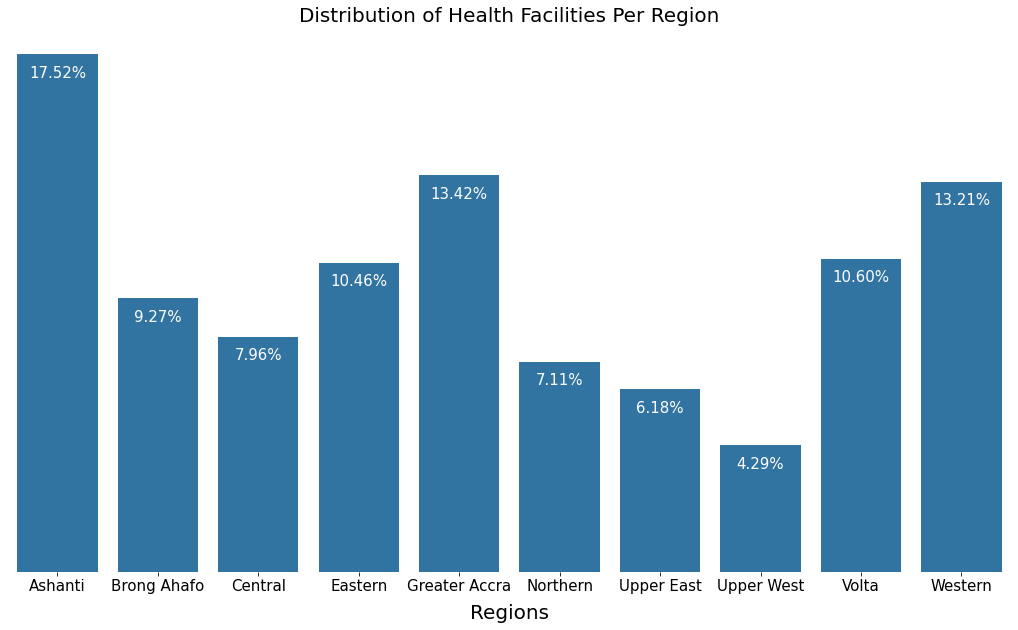

In [144]:
# Distribution of Clinics Per Region
default_color = sb.color_palette()[0]
plt.figure(figsize=[18,10])
sb.countplot(data=clean_df, x='region', color=default_color)


# add annotations
n_points = clean_df.shape[0]
cat_counts = clean_df.region.value_counts()
locs, labels = plt.xticks() # get the current tick locations and labels

# loop through each pair of locations and labels
for loc, label in zip(locs, labels):

    # get the text property for the label to get the correct count
    count = cat_counts[label.get_text()]
    pct_string = '{:0.2f}%'.format(100*count/n_points)

    # print the annotation just below the top of the bar
    plt.text(loc, count-30, pct_string, ha = 'center', color = 'w', fontsize=15)
    
    
# plt.ylabel('Number of Health Facilities', fontsize=20)
plt.ylabel('')
plt.xlabel('Regions', labelpad=10, fontsize=20)
plt.title('Distribution of Health Facilities Per Region', fontsize=20)
plt.yticks([])
plt.xticks(fontsize=15)
plt.box(on=None);

In [145]:
# # Clinics per Region
# plt.figure(figsize=[20,10])
# ashanti_df = clean_df.query('region == "Ashanti"')
# sb.countplot(data=clean_df, x='region', hue='type', color=default_color);

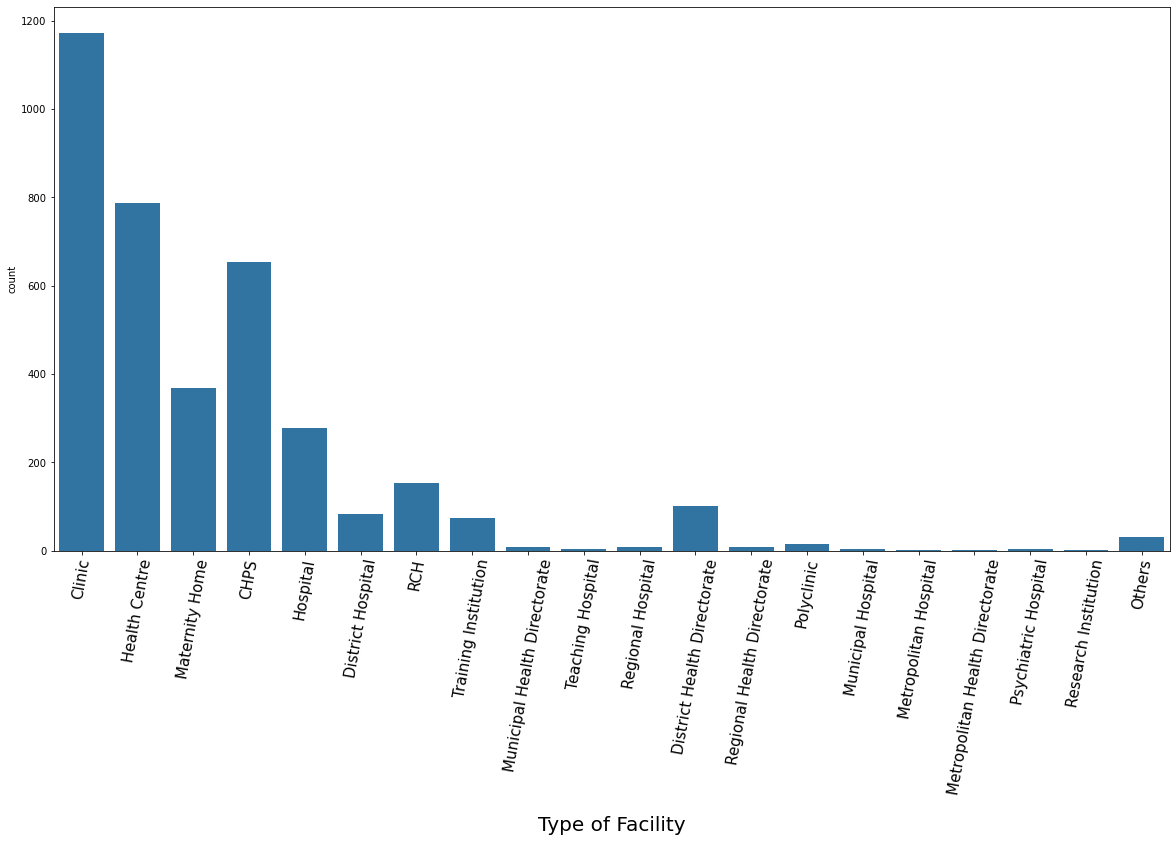

In [146]:
plt.figure(figsize=[20,10])
sb.countplot(data=clean_df, x='type', color=default_color);
plt.xticks(rotation=80, fontsize=15);
plt.xlabel('Type of Facility', labelpad=20, fontsize=20);

In [147]:
# Plot Health Facilities Location on Maps
gdf = geopandas.GeoDataFrame(clean_df,
                             geometry=geopandas.points_from_xy(clean_df.longitude, clean_df.latitude))

<Figure size 1080x720 with 0 Axes>

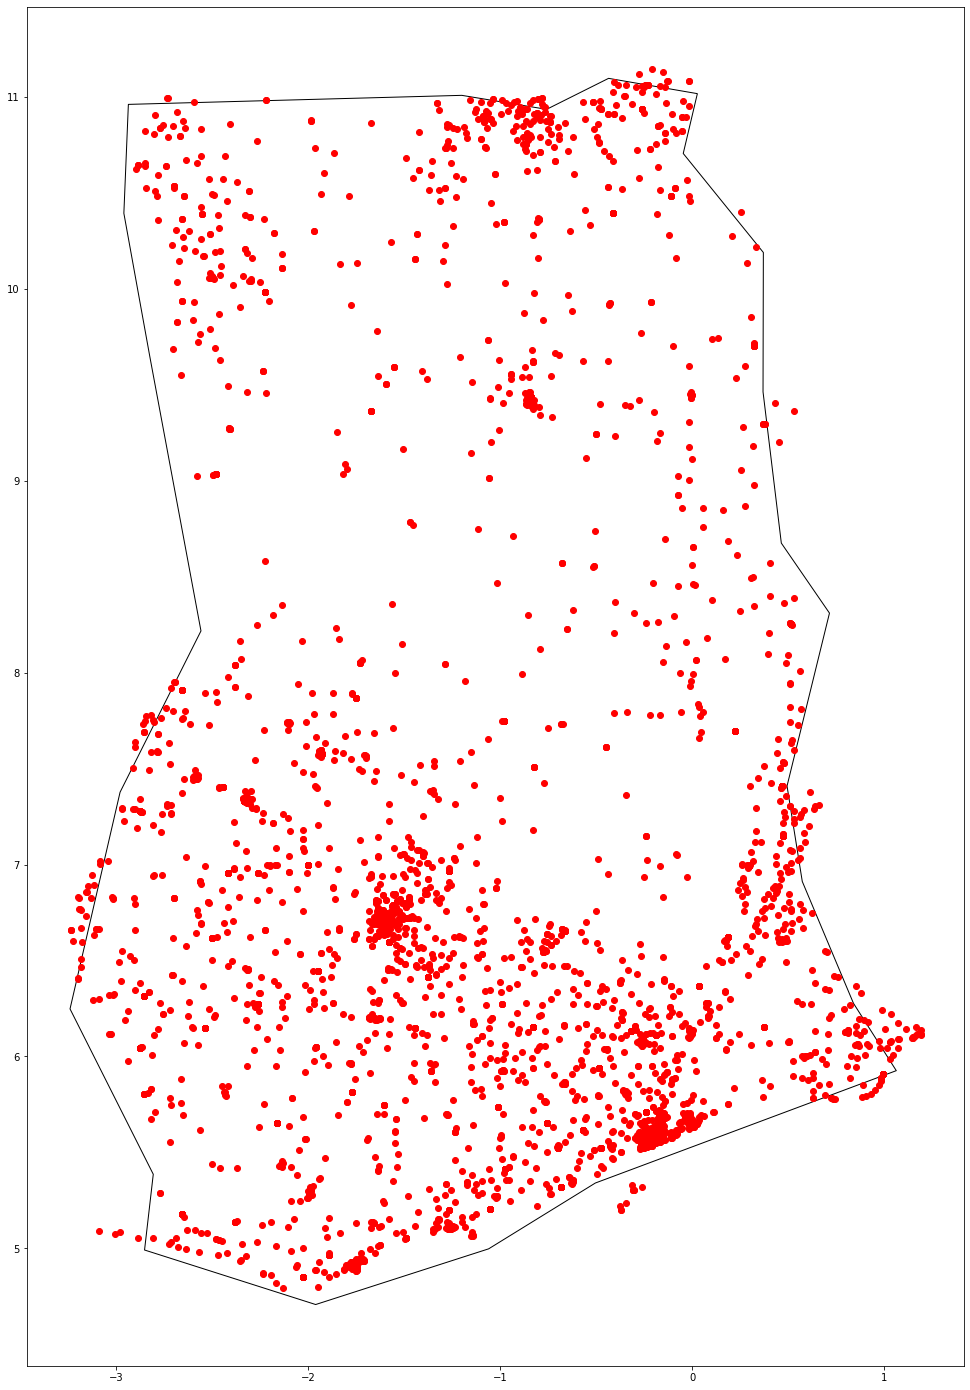

In [148]:
world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))
plt.figure(figsize=[15,10])
# We restrict to Brazil
ax = world[world.name == 'Ghana'].plot(figsize=(25,25),color='white', edgecolor='black')

# We can now plot our ``GeoDataFrame``.
gdf.plot(ax=ax, color='red')

plt.show()